In [1]:
import matplotlib.pyplot as plt

**!!! данные взяты из output-а MaxMinMatrixValue.cpp**

In [16]:
thread_count = [2, 4, 8, 16]
element_count = [10, 1000, 100000, 1000000]

In [17]:
atomic_data ={2:[0,0,0.006,0.048],4:[0,0,0.006,0.075],8:[0,0,0.01,0.093],16:[0,0,0.01,0.098]}
reduction_data ={2:[0.001,0,0,0.002],4:[0,0.001,0,0.002],8:[0.001,0,0,0.001],16:[0,0,0,0]}
consistent_data ={2:[0,0,0,0.002],4:[0,0,0,0.003],8:[0,0,0,0.003],16:[0,0,0.001,0.002]}
lock_data ={2:[0,0.009,0.949,9.124],4:[0,0.005,0.964,9.957],8:[0,0.007,1.008,9.212],16:[0,0.009,0.87,9.067]}
critical_data ={2:[0,0,0.003,0.034],4:[0,0,0.003,0.027],8:[0,0.001,0.004,0.048],16:[0,0,0.012,0.048]}

***Визуализация времени работы программы к размерности программы:***

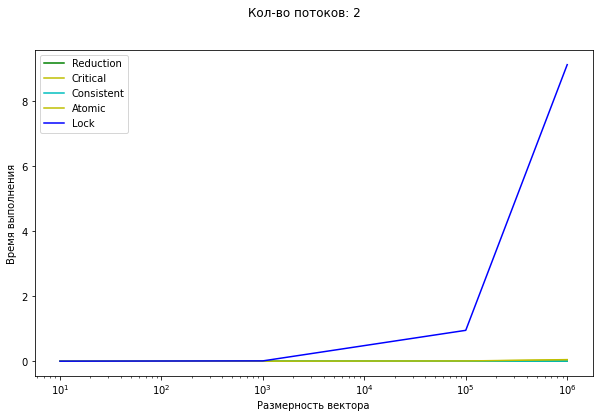

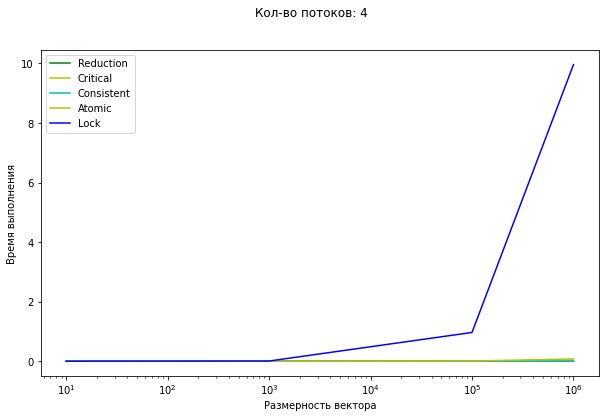

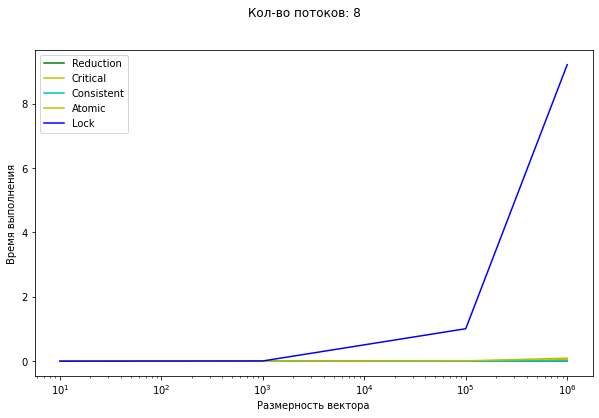

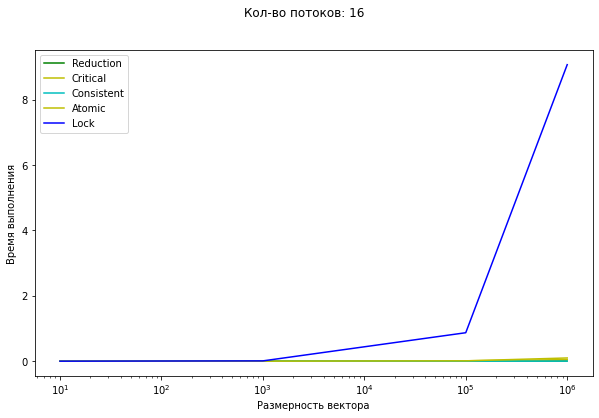

In [18]:
for i in range (len(element_count)):
    fig, ax1 = plt.subplots(ncols=1, figsize=(10, 6))
    ax1.set_xlabel('Размерность вектора')
    ax1.set_ylabel('Время выполнения')
    
    fig.suptitle('Кол-во потоков: %i' %(thread_count[i]))
    
    ax1.plot(element_count, reduction_data[thread_count[i]], label = "Reduction", color='g')
    ax1.plot(element_count, critical_data[thread_count[i]], label = "Critical", color='y')
    ax1.plot(element_count, consistent_data[thread_count[i]], label = "Consistent", color='c')
    ax1.plot(element_count, atomic_data[thread_count[i]], label = "Atomic", color='y')
    ax1.plot(element_count, lock_data[thread_count[i]], label = "Lock", color='b')
    

    ax1.legend()
    plt.xscale('log')
    plt.yscale('linear')

В задаче обычной редукции хуже всего показали себя локи. Прироста производительности они не дают.

Прирост от остальных способов почти одинаков

***Визуализация времени работы программы к кол-ву потоков:***

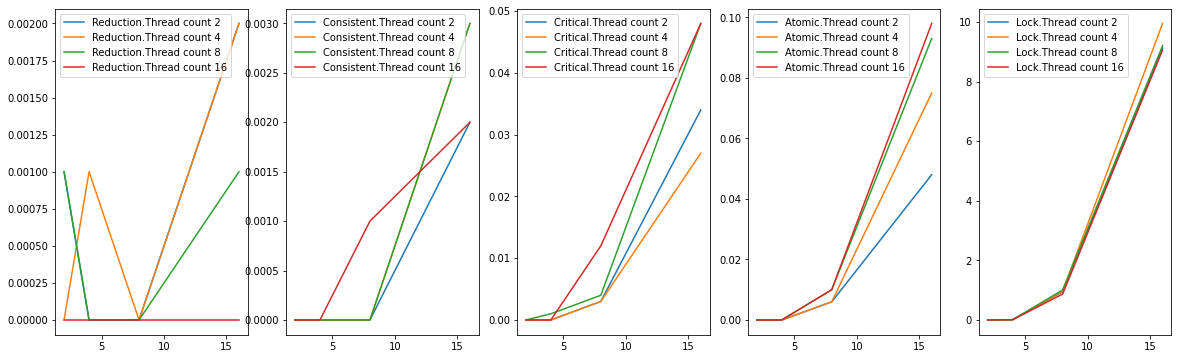

In [21]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5, figsize=(20, 6))

for i in range(len(reduction_data)):
    ax1.plot(thread_count, reduction_data[thread_count[i]], label = 'Reduction.Thread count ' + str(thread_count[i]))
    ax2.plot(thread_count, consistent_data[thread_count[i]], label = 'Consistent.Thread count ' + str(thread_count[i]))
    ax3.plot(thread_count, critical_data[thread_count[i]], label = 'Critical.Thread count ' + str(thread_count[i]))
    ax4.plot(thread_count, atomic_data[thread_count[i]], label = 'Atomic.Thread count ' + str(thread_count[i]))
    ax5.plot(thread_count, lock_data[thread_count[i]], label = 'Lock.Thread count ' + str(thread_count[i]))

    
    

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

Здесь мы можем видеть, как кол-во потоков влияет на обработку данных. Reduce и критические блоки с увелечением кол-ва потоков стремительно уменьшает время выполнения программы. Особенно, в случае мигрорования с однопоточного приложения.

Однако, с определенного момента, кол-во потоков перестаев влиять на время исполнения в случае Reduce, однако в тоже самое время все еще дает прирост в критической секции

**Визуализация ускорения работы программы:**

In [22]:
speed_up_reduce = {k: [ b/ (b / (m +0.0000000001) + 0.0000000001) for b, m in zip(consistent_data[k], reduction_data[k])] for k in consistent_data if k in reduction_data}
speed_up_critical = {k: [ b/ (b / (m +0.0000000001) + 0.0000000001) for b, m in zip(consistent_data[k], critical_data[k])] for k in consistent_data if k in critical_data}
speed_up_atomic = {k: [ b/ (b / (m +0.0000000001) + 0.0000000001) for b, m in zip(consistent_data[k], atomic_data[k])] for k in consistent_data if k in atomic_data}
speed_up_lock = {k: [ b/ (b / (m +0.0000000001) + 0.0000000001) for b, m in zip(consistent_data[k], lock_data[k])] for k in consistent_data if k in lock_data}

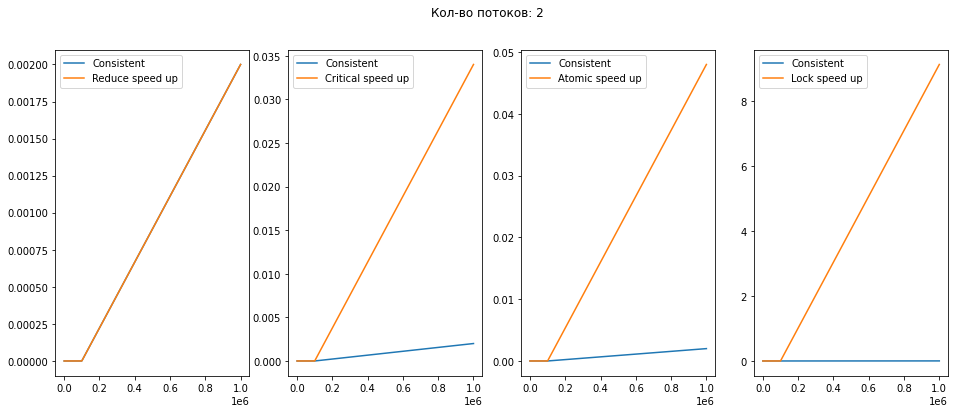

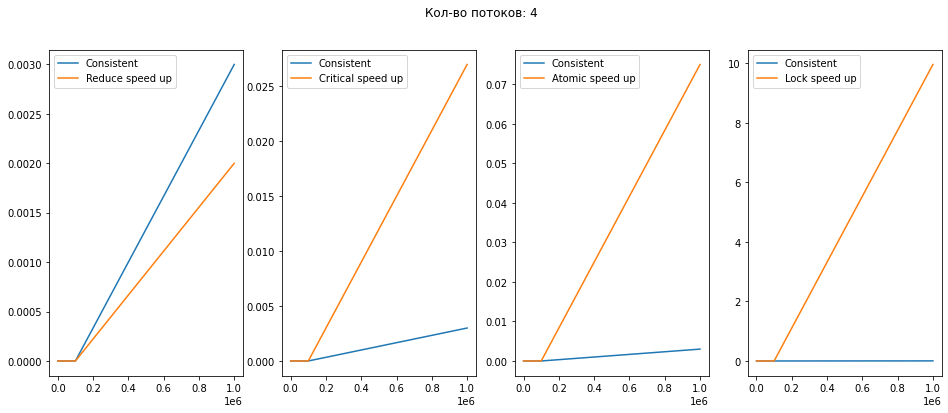

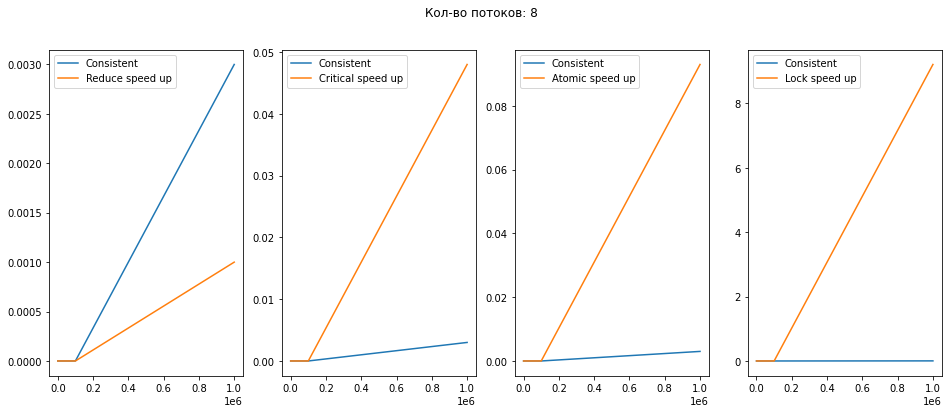

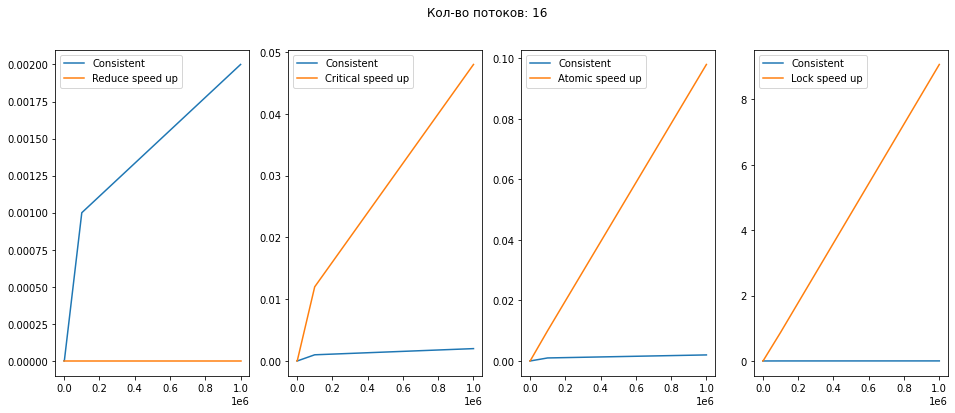

In [24]:
for i in range (len(element_count)):
    fig, (ax1, ax2, ax3, ax4 ) = plt.subplots(ncols=4, figsize=(16, 6))
    fig.suptitle('Кол-во потоков: %i' %(thread_count[i]))
    
    ax1.plot(element_count, consistent_data[thread_count[i]], label = "Consistent")
    ax1.plot(element_count, speed_up_reduce[thread_count[i]], label = "Reduce speed up")
    
    ax2.plot(element_count, consistent_data[thread_count[i]], label = "Consistent")
    ax2.plot(element_count, speed_up_critical[thread_count[i]], label = "Critical speed up")
    
    ax3.plot(element_count, consistent_data[thread_count[i]], label = "Consistent")
    ax3.plot(element_count, speed_up_atomic[thread_count[i]], label = "Atomic speed up")
    
    ax4.plot(element_count, consistent_data[thread_count[i]], label = "Consistent")
    ax4.plot(element_count, speed_up_lock[thread_count[i]], label = "Lock speed up")
    
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()